# Exercise: Exploratory Data Analysis with Pandas
## Instructions
1. Data Collection
    - Search and collect data on the following: (1993 - 2023)
        - Israel interest tares
        - US interest rates
        - USD to ILS exchange rates
    - For each dataset, create a pandas DataFrame with the following columns:
        - Year
        - Month
        - Current_Rate (Interest rate or exchange rate for that month)
        - Change_From_Last_Month (Difference in Current_Rate from the previous month)
        - Optional: You may include additional columns if you find them useful (e.g., Change_Percentage, Date).



In [ ]:
import pandas as pd

In [ ]:
isr_url = "C:\\Users\\Admin\\PycharmProjects\\pandas_exem\\data.csv"
usa_url = "C:\\Users\\Admin\\PycharmProjects\\pandas_exem\\FEDFUNDS.csv"
usa_to_ils_url = "C:\\Users\\Admin\\PycharmProjects\\pandas_exem\\USD_ILS Historical Data (2).csv"

isr_rate = pd.read_csv(isr_url)
isr_rate["Time period"] = pd.to_datetime(isr_rate['Time period'])
isr_rate["Year"] = isr_rate["Time period"].dt.year
isr_rate["Month"] = isr_rate["Time period"].dt.month
isr_rate['Current_Rate']  = pd.to_numeric(isr_rate['Rate'])
isr_rate["Change_From_Last_Month"] = isr_rate['Current_Rate'].diff()
isr_rate = isr_rate.drop(["Time period","Rate"], axis=1)

usa_rate = pd.read_csv(usa_url)
usa_rate['DATE'] = pd.to_datetime(usa_rate['DATE'])
usa_rate['Year'] = usa_rate['DATE'].dt.year
usa_rate['Month'] = usa_rate['DATE'].dt.month
usa_rate['Current_Rate']  = pd.to_numeric(usa_rate['FEDFUNDS'])
usa_rate["Change_From_Last_Month"] = usa_rate['Current_Rate'].diff()
usa_rate = usa_rate.drop(['DATE', 'FEDFUNDS'], axis=1)

usa_to_ils = pd.read_csv(usa_to_ils_url)
usa_to_ils["Date"] = pd.to_datetime(usa_to_ils["Date"])
usa_to_ils["Year"] = usa_to_ils["Date"].dt.year
usa_to_ils["Month"] = usa_to_ils["Date"].dt.month
usa_to_ils["Current_Rate"] = pd.to_numeric(usa_to_ils['Price'])
usa_to_ils["Change_From_Last_Month"] = usa_to_ils['Current_Rate'].diff()
usa_to_ils["Change_From_Last_Month_Percent"] = usa_to_ils["Change %"]
usa_to_ils = usa_to_ils.drop(["Date","Price","Open","High","Low","Vol.","Change %"],axis=1)

## Part A: Single DataFrame Analysis 
1. Display the first 5 rows of the US interest rates DataFrame.

2. Calculate the average Israeli interest rate over the period covered by your data.

3. Find the month and year when the USD to ILS exchange rate had the highest increase from the previous month.

4. Determine the total number of months where the US interest rate decreased compared to the previous month.

5. Add a new column to the Israeli interest rates DataFrame called Change_Percentage, representing the percentage change from the previous month.



In [ ]:
# A - 1
# your code here
usa_rate.head()

In [ ]:
# A - 2
# your code here
isr_rate["Current_Rate"].mean()

In [ ]:
# A - 3
# your code here
max_increase_date = usa_to_ils.loc[usa_to_ils['Change_From_Last_Month'].idxmax(), ['Year', 'Month','Change_From_Last_Month']]
max_increase_date


In [ ]:
# A - 4
# your code here
months_with_decrease = (usa_rate['Change_From_Last_Month'] < 0).sum()
months_with_decrease


In [ ]:
# A - 5
# your code here
isr_rate['Change_Percentage'] = isr_rate['Change_From_Last_Month'] / 100
usa_rate['Change_Percentage'] = isr_rate['Change_From_Last_Month'] / 100 # help for q 3


## Part B: Merging DataFrames
1. Merge the US and Israeli interest rates DataFrames on Year and Month.

2. In the merged DataFrame, create a new column Rate_Difference that shows the difference between the Israeli and US interest rates for each month.

3. Identify all months when the Israeli interest rate was at least 1% higher than the US interest rate - IH (Israeli Higher).
Identify all months when the US interest rate was at least 1% higher than the Israeli interest rate - UH (US Higher).
Identify all months when the interest rates were within 1% of each other - N (Near)
make a new column called Rate_Comparison with the following values: IH, UH, or N.

4. Merge the exchange rate DataFrame with the merged interest rates DataFrame.

5. After merging all three DataFrames, find the correlation between the Rate_Difference and the Current_Rate of the exchange rate.
hint: find the connection between the difference in interest rates and the exchange rates, use any method you think is appropriate.
provide an explanation of the results (in Hebrew) - at least 2 rows of text + a proof of the connection(some output) you found.


In [ ]:
# B - 1
# your code here
merged_df = pd.merge(isr_rate,usa_rate,on=['Year','Month'])
merged_df

In [ ]:

# B - 2
# your code here
merged_df["Rate_Difference"] = merged_df["Current_Rate_x"] - merged_df["Current_Rate_y"]
merged_df.head()

In [ ]:
# B - 3
# your code here
# merged_df["Rate_Comparison"] = [if rx-ry > 0.01 else ry-rx >0.01 else rx-ry<0.01 for rx,ry in zip(merged_df["Change_Percentage_x"],merged_df["Change_Percentage_y"])]
import numpy as np

condlist = [
    (merged_df["Change_Percentage_x"] - merged_df["Change_Percentage_y"] > 0.01),  # IH
    (merged_df["Change_Percentage_y"] - merged_df["Change_Percentage_x"] > 0.01),  # UH
    (np.abs(merged_df["Change_Percentage_x"] - merged_df["Change_Percentage_y"]) <= 0.01)  # N
]

choicelist  = ["IH", "UH", "N"]

merged_df["Rate_Comparison"] = np.select(condlist, choicelist, default=np.nan)
merged_df.head()


In [28]:
# B - 4
# your code here
merged_df_sofi = pd.merge(merged_df,usa_to_ils,on=['Year','Month'])
merged_df_sofi

,Year,Month,Current_Rate_x,Change_From_Last_Month_x,Change_Percentage_x,Current_Rate_y,Change_From_Last_Month_y,Change_Percentage_y,Rate_Difference,Rate_Comparison,Current_Rate,Change_From_Last_Month,Change_From_Last_Month_Percent
0,1994,1,11.780,NaN,NaN,3.05,0.09,0.0005,8.730,nan,2.9872,0.0112,0.17%
1,1994,2,11.870,0.090,0.00090,3.25,0.20,-0.0015,8.620,N,2.9760,0.0099,-0.37%
2,1994,3,11.870,0.000,0.00000,3.34,0.09,-0.0099,8.530,N,2.9661,-0.0349,-0.33%
3,1994,4,11.870,0.000,0.00000,3.56,0.22,-0.0117,8.310,IH,3.0010,-0.0350,1.18%
4,1994,5,12.240,0.370,0.00370,4.01,0.45,-0.0069,8.230,IH,3.0360,0.0093,1.17%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2022,9,3.500,0.581,0.00581,2.56,0.23,0.0000,0.940,N,3.5628,0.0414,7.05%
345,2022,10,4.056,0.556,0.00556,3.08,0.52,0.0000,0.976,N,3.5214,0.1138,-1.16%
346,2022,11,4.367,0.311,0.00311,3.78,0.70,0.0000,0.587,N,3.4076,-0.1101,-3.23%
347,2022,12,4.750,0.383,0.00383,4.10,0.32,0.0000,0.650,N,3.5177,0.0685,3.23%


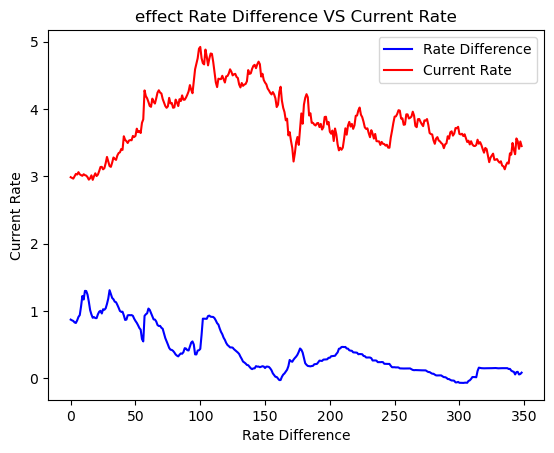

In [47]:
# B - 5
# your code here
# import matplotlib.pyplot as plt
# xp = np.array(merged_df_sofi['Rate_Difference']/10)
# yp = np.array(merged_df_sofi['Current_Rate'])
# 
# plt.plot(xp,color='blue')
# plt.plot(yp,color='red')
# plt.title("effect Rate Difference VS Current Rate")
# plt.xlabel('Rate Difference')
# plt.ylabel('Current Rate')
# plt.legend(['Rate Difference','Current Rate'])
# plt.show()

# אחרי שבדקתי את הגרפים כולל לחלק את בתוצאה ב 10 בכדי שהגרפים יהיו יותר אינפורמטיביים
# הגעתי למסקנה שאין קשר מוחלט אך קיים קשר כלשהו

In [59]:
# B - 5
# your code here
correlation = merged_df_sofi['Rate_Difference'].corr(merged_df_sofi['Current_Rate'])
correlation
# אין קורלציה מכיוון שהערך הוא -0.1
# בכדי שיהיה קורלציה צריך שיהיה  1 או -1

-0.10965380031569903

## Part C: Analyzing Relationships Between DataFrames
1. Analyze whether increases in US interest rates are associated with increases or decreases in the USD to ILS exchange rate in the same month.

2. Determine if changes in the Israeli interest rate have a stronger impact on the exchange rate than changes in the US interest rate.

3. Find any time lags in the effect of interest rate changes on the exchange rate. For example, does a change in US interest rates affect the exchange rate in the following month?
(כלומר- האם כשיש שינוי בריבית כלשהי - האם מייד יש שינוי בשער ההמרה? או שיש דיליי של חודש/חודשים עד שמרגישים את ההשפעה - אם בכלל?)

4. Calculate the rolling past 3-month average of the exchange rate for each data time, and add it as a new column.

5. Identify any periods where both US and Israeli interest rates were decreasing, and analyze how the exchange rate behaved during those periods.



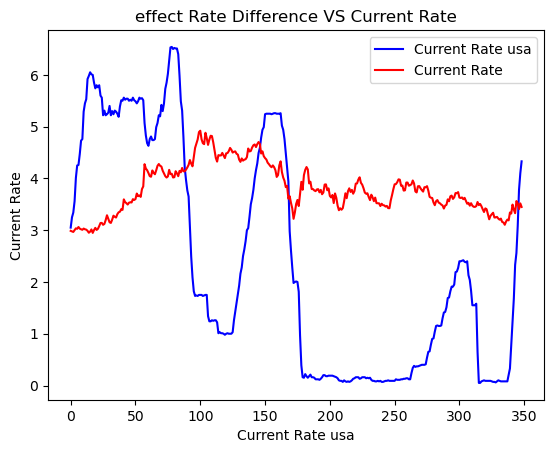

In [48]:
# C - 1
# your code here
import matplotlib.pyplot as plt
xp = np.array(merged_df_sofi['Current_Rate_y'])
yp = np.array(merged_df_sofi['Current_Rate'])

plt.plot(xp,color='blue')
plt.plot(yp,color='red')
plt.title("effect Rate usa VS Current Rate")
plt.xlabel('Current Rate usa')
plt.ylabel('Current Rate')
plt.legend(['Current Rate usa','Current Rate'])
plt.show()
# אפשר לראות שבין הערכים 170-270 אין שינויים דרסטיים בריבית ארהב אך בדולר יש
# מסקנה : אין קשר

In [60]:
correlation = merged_df_sofi['Current_Rate_y'].corr(merged_df_sofi['Current_Rate'])
correlation
# אין קשר

0.01072637906629379

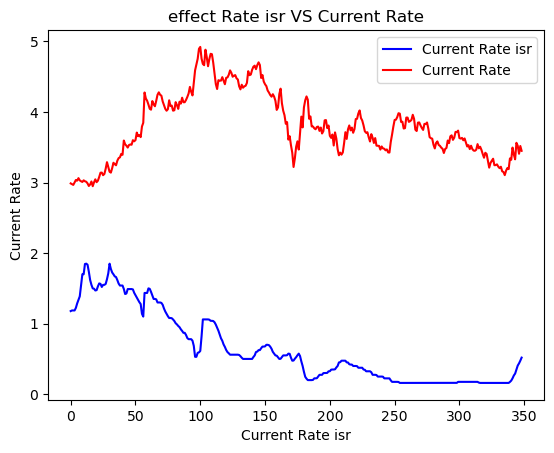

In [51]:
# C - 2
# your code here
import matplotlib.pyplot as plt
xp = np.array(merged_df_sofi['Current_Rate_x']/10)
yp = np.array(merged_df_sofi['Current_Rate'])

plt.plot(xp,color='blue')
plt.plot(yp,color='red')
plt.title("effect Rate isr VS Current Rate")
plt.xlabel('Current Rate isr')
plt.ylabel('Current Rate')
plt.legend(['Current Rate isr','Current Rate'])
plt.show()
# גם לישראל אין קשר מוחלט אך יש יותר קורלציה מאשר ארהב
# מסקנה יש יותר מארהב

In [62]:
correlation = merged_df_sofi['Current_Rate_x'].corr(merged_df_sofi['Current_Rate'])
correlation
# אין קורלציה מוחלטת אבל יש משהו

-0.07180137234174294

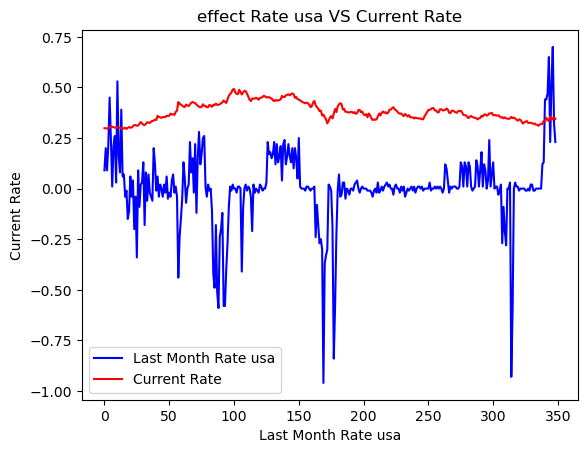

In [55]:
# C - 3
# your code here
import matplotlib.pyplot as plt
xp = np.array(merged_df_sofi['Change_From_Last_Month_y'])
yp = np.array(merged_df_sofi['Current_Rate']/10)

plt.plot(xp,color='blue')
plt.plot(yp,color='red')
plt.title("effect Rate usa VS Current Rate")
plt.xlabel('Last Month Rate usa')
plt.ylabel('Current Rate')
plt.legend(['Last Month Rate usa','Current Rate'])
plt.show()
# מסקנה : אין קשר

In [63]:
# correlation = merged_df_sofi['Change_From_Last_Month_y'].corr(merged_df_sofi['Current_Rate'])
# correlation
# אין קורלציה מוחלטת אבל יש משהו

-0.07018060682253639

In [58]:
# C - 4
# your code here
merged_df_sofi["rolling_3_month_avg"] = merged_df_sofi['Current_Rate'].rolling(3).mean()
merged_df_sofi.head()

,Year,Month,Current_Rate_x,Change_From_Last_Month_x,Change_Percentage_x,Current_Rate_y,Change_From_Last_Month_y,Change_Percentage_y,Rate_Difference,Rate_Comparison,Current_Rate,Change_From_Last_Month,Change_From_Last_Month_Percent,rolling_3_month_avg
0,1994,1,11.78,NaN,NaN,3.05,0.09,0.0005,8.73,nan,2.9872,0.0112,0.17%,NaN
1,1994,2,11.87,0.09,0.0009,3.25,0.20,-0.0015,8.62,N,2.9760,0.0099,-0.37%,NaN
2,1994,3,11.87,0.00,0.0000,3.34,0.09,-0.0099,8.53,N,2.9661,-0.0349,-0.33%,2.976433
3,1994,4,11.87,0.00,0.0000,3.56,0.22,-0.0117,8.31,IH,3.0010,-0.0350,1.18%,2.981033
4,1994,5,12.24,0.37,0.0037,4.01,0.45,-0.0069,8.23,IH,3.0360,0.0093,1.17%,3.001033


In [ ]:
# Bonus 

# Bonus
choose 3 global / local events or periods that you think could have affected the exchange rate or interest rates
and analyze the effect of these events on the data you collected.
show proof of your analysis that supports your claim.

(כלומר- תבחנו אירועים שקרו בתקופה שאתם עובדים עליה ובדקו איך הם השפיעו על הנתונים שאתם עובדים איתם)
למשל: בחירות בארה״ב, בחירות בישראל, רוסיה אוקראינה, מלחמות בישראל וכו׳.

In [ ]:
# Your code here